## 1. IMPORT FILES


In [74]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
# Read a CSV file into a Pandas DataFrame
df = pd.read_csv('D:\\data analytics sem 4\\DAB 422 CAPSTONE PROJECT2\\ASSIGNMENTS\\cyclistdata_updated.csv')
df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_7232\2803805264.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\\data analytics sem 4\\DAB 422 CAPSTONE PROJECT2\\ASSIGNMENTS\\cyclistdata_updated.csv')


,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,rider_class,day_of_week,route,month,lat1_rad,lon1_rad,lat2_rad,lon2_rad,distance
0,620BC6107255BF4C,electric_bike,2021-10-22 8:46,2021-10-22 8:49,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,...,-87.63,member,6,NaN,Oct,0.731104,-1.529580,0.731118,-1.529432,0.709015666
1,4471C70731AB2E45,electric_bike,2021-10-21 5:12,2021-10-21 5:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,...,-87.71,member,5,NaN,Oct,0.731817,-1.530654,0.731817,-1.530828,0.827247742
2,26CA69D43D15EE14,electric_bike,2021-10-16 12:28,2021-10-16 12:36,NaN,NaN,NaN,NaN,41.920000,-87.700000,...,-87.72,member,7,NaN,Oct,0.731642,-1.530654,0.731991,-1.531003,2.771836915
3,362947F0437E1514,electric_bike,2021-10-16 12:17,2021-10-16 12:19,NaN,NaN,NaN,NaN,41.920000,-87.690000,...,-87.69,member,7,NaN,Oct,0.731642,-1.530479,0.731642,-1.530479,0
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 19:17,2021-10-20 19:26,NaN,NaN,NaN,NaN,41.890000,-87.710000,...,-87.69,member,4,NaN,Oct,0.731118,-1.530828,0.731118,-1.530479,1.655532546


In [75]:
# Create the fact table for rides
fact_ride = df[['ride_id', 'bike_type', 'started_at', 'ended_at', 'start_station_id', 'end_station_id', 'rider_class', 'distance', 'day_of_week', 'route', 'month']]
fact_ride.head()

,ride_id,bike_type,started_at,ended_at,start_station_id,end_station_id,rider_class,distance,day_of_week,route,month
0,620BC6107255BF4C,electric_bike,2021-10-22 8:46,2021-10-22 8:49,KA1503000043,NaN,member,0.709015666,6,NaN,Oct
1,4471C70731AB2E45,electric_bike,2021-10-21 5:12,2021-10-21 5:14,NaN,NaN,member,0.827247742,5,NaN,Oct
2,26CA69D43D15EE14,electric_bike,2021-10-16 12:28,2021-10-16 12:36,NaN,NaN,member,2.771836915,7,NaN,Oct
3,362947F0437E1514,electric_bike,2021-10-16 12:17,2021-10-16 12:19,NaN,NaN,member,0,7,NaN,Oct
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 19:17,2021-10-20 19:26,NaN,NaN,member,1.655532546,4,NaN,Oct


In [76]:
# Create the dimension table for start stations
dim_start_station = df[['start_station_id', 'start_station_name', 'start_lat', 'start_lng','lat1_rad','lon1_rad']]
dim_start_station.head()

,start_station_id,start_station_name,start_lat,start_lng,lat1_rad,lon1_rad
0,KA1503000043,Kingsbury St & Kinzie St,41.889186,-87.638495,0.731104,-1.529580
1,NaN,NaN,41.930000,-87.700000,0.731817,-1.530654
2,NaN,NaN,41.920000,-87.700000,0.731642,-1.530654
3,NaN,NaN,41.920000,-87.690000,0.731642,-1.530479
4,NaN,NaN,41.890000,-87.710000,0.731118,-1.530828


In [77]:
# Create the dimension table for end stations
dim_end_station = df[['end_station_id', 'end_station_name', 'end_lat', 'end_lng', 'lat2_rad', 'lon2_rad']]
dim_end_station.head()

,end_station_id,end_station_name,end_lat,end_lng,lat2_rad,lon2_rad
0,NaN,NaN,41.89,-87.63,0.731118,-1.529432
1,NaN,NaN,41.93,-87.71,0.731817,-1.530828
2,NaN,NaN,41.94,-87.72,0.731991,-1.531003
3,NaN,NaN,41.92,-87.69,0.731642,-1.530479
4,NaN,NaN,41.89,-87.69,0.731118,-1.530479


In [78]:
# Export the DataFrame to a CSV file
fact_ride.to_csv('D:\\data analytics sem 4\\DAB 422 CAPSTONE PROJECT2\\ASSIGNMENTS\\fact_ride.csv', index=False)


In [79]:
# Export the DataFrame to a CSV file
dim_start_station.to_csv('D:\\data analytics sem 4\\DAB 422 CAPSTONE PROJECT2\\ASSIGNMENTS\\dim_start_station.csv', index=False)


In [80]:
# Export the DataFrame to a CSV file
dim_end_station.to_csv('D:\\data analytics sem 4\\DAB 422 CAPSTONE PROJECT2\\ASSIGNMENTS\\dim_end_station.csv', index=False)


## 2.DATASET CLEANING

### REMOVE MISSING VALUES

In [81]:
fact_ride.isnull().sum()

ride_id                  0
bike_type                0
started_at               0
ended_at                 0
start_station_id    185034
end_station_id      194424
rider_class              0
distance               682
day_of_week              0
route               259265
month                    0
dtype: int64

In [82]:
df1=fact_ride.dropna()

In [83]:
df1.shape

(789310, 11)

In [84]:
df1.isnull().sum()

ride_id             0
bike_type           0
started_at          0
ended_at            0
start_station_id    0
end_station_id      0
rider_class         0
distance            0
day_of_week         0
route               0
month               0
dtype: int64

In [85]:
dim_start_station.isnull().sum()

start_station_id      185034
start_station_name    185034
start_lat                  0
start_lng                  0
lat1_rad                   0
lon1_rad                   0
dtype: int64

In [86]:
df2=dim_start_station.dropna()

In [87]:
df2.isnull().sum()

start_station_id      0
start_station_name    0
start_lat             0
start_lng             0
lat1_rad              0
lon1_rad              0
dtype: int64

In [88]:
dim_end_station.isnull().sum()

end_station_id      194424
end_station_name    194424
end_lat                682
end_lng                682
lat2_rad               682
lon2_rad               682
dtype: int64

In [89]:
df3=dim_end_station.dropna()

In [90]:
df3.isnull().sum()

end_station_id      0
end_station_name    0
end_lat             0
end_lng             0
lat2_rad            0
lon2_rad            0
dtype: int64

### REMOVE UNNECESSARY COLUMNS

In [91]:
df2_cleaned = df2.drop(columns=['lat1_rad','lon1_rad'])


In [92]:
df3_cleaned = df3.drop(columns=['lat2_rad','lon2_rad'])

### REMOVE DUPLICATE ROWS

In [93]:
df1.duplicated()

25         False
69         False
76         False
84         False
94         False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 789310, dtype: bool

In [94]:
df2_cleaned.duplicated()

0          False
25         False
39         False
69         False
74         False
           ...  
1048570    False
1048571     True
1048572     True
1048573    False
1048574    False
Length: 863541, dtype: bool

In [95]:
df3_cleaned.duplicated()

25         False
69         False
76          True
84          True
93         False
           ...  
1048570     True
1048571     True
1048572     True
1048573     True
1048574     True
Length: 854151, dtype: bool

In [96]:
ride = df1.drop_duplicates()

In [97]:
start = df2_cleaned.drop_duplicates()

In [98]:
end=df3_cleaned.drop_duplicates()

In [99]:
ride.duplicated()

25         False
69         False
76         False
84         False
94         False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 789310, dtype: bool

In [100]:
start.duplicated()

0          False
25         False
39         False
69         False
74         False
           ...  
1048558    False
1048566    False
1048570    False
1048573    False
1048574    False
Length: 322762, dtype: bool

In [101]:
end.duplicated()

25         False
69         False
93         False
94         False
95         False
           ...  
1048507    False
1048522    False
1048527    False
1048557    False
1048564    False
Length: 301070, dtype: bool

In [102]:
ride.dtypes

ride_id             object
bike_type           object
started_at          object
ended_at            object
start_station_id    object
end_station_id      object
rider_class         object
distance            object
day_of_week          int64
route               object
month               object
dtype: object

In [103]:
start.dtypes

start_station_id       object
start_station_name     object
start_lat             float64
start_lng             float64
dtype: object

In [104]:
end.dtypes

end_station_id       object
end_station_name     object
end_lat             float64
end_lng             float64
dtype: object

### DATATYPE CONVERSION


In [105]:
# Convert 'started_at' and 'ended_at' columns to datetime objects
ride['started_at'] = pd.to_datetime(ride['started_at'])
ride['ended_at'] = pd.to_datetime(ride['ended_at'])

In [106]:
# Convert 'distance' column to numeric (convert non-numeric values to NaN)
ride['distance'] = pd.to_numeric(ride['distance'], errors='coerce')

In [107]:
# Check for remaining non-numeric values in 'distance' column
non_numeric_values = ride[ride['distance'].isna()]
print("Non-Numeric Values in 'distance' Column:")
print(non_numeric_values)

Non-Numeric Values in 'distance' Column:
                  ride_id     bike_type          started_at  \
19280    960ED29DAC399C2A  classic_bike 2021-10-04 12:34:00   
19281    6BB2CD6EC6CE7FB1  classic_bike 2021-10-18 13:27:00   
19284    1CB294FDF20DDF21  classic_bike 2021-10-10 12:16:00   
19418    8B909C5C87B09B3E  classic_bike 2021-10-13 14:17:00   
19499    247CF96EBF6F6220  classic_bike 2021-10-08 19:07:00   
...                   ...           ...                 ...   
1039448  FB79D93D9994CEF5  classic_bike 2021-12-11 22:04:00   
1039449  1D44F0194308E750  classic_bike 2021-12-06 07:45:00   
1039562  C9931787A5A724D0  classic_bike 2021-12-03 17:59:00   
1047387  8755356E4306F291  classic_bike 2021-12-21 08:41:00   
1047394  57208FCB9245FA67  classic_bike 2021-12-31 10:19:00   

                   ended_at start_station_id end_station_id rider_class  \
19280   2021-10-04 12:52:00            13008          13008      member   
19281   2021-10-18 14:20:00            13008        

In [108]:
ride1=ride.dropna()


In [109]:
# Check for remaining non-numeric values in 'distance' column
non_numeric_values = ride1[ride1['distance'].isna()]
print("Non-Numeric Values in 'distance' Column:")
print(non_numeric_values)

Non-Numeric Values in 'distance' Column:
Empty DataFrame
Columns: [ride_id, bike_type, started_at, ended_at, start_station_id, end_station_id, rider_class, distance, day_of_week, route, month]
Index: []


In [110]:
ride1

,ride_id,bike_type,started_at,ended_at,start_station_id,end_station_id,rider_class,distance,day_of_week,route,month
25,614B15BC42810184,docked_bike,2021-10-05 06:56:00,2021-10-05 07:38:00,13042,13042,casual,0.000000,3,Michigan Ave & Oak St - to -Michigan Ave & Oak St,Oct
69,ADCC6E3CF9C04688,classic_bike,2021-10-06 09:55:00,2021-10-06 09:58:00,TA1306000003,KA1503000043,member,0.494535,4,Desplaines St & Kinzie St - to -Kingsbury St &...,Oct
76,6184CC57243AEF3C,docked_bike,2021-10-16 06:19:00,2021-10-16 08:01:00,13042,13042,casual,0.000000,7,Michigan Ave & Oak St - to -Michigan Ave & Oak St,Oct
84,DE02D027BAC5C820,docked_bike,2021-10-24 07:03:00,2021-10-24 09:10:00,13042,13042,casual,0.000000,1,Michigan Ave & Oak St - to -Michigan Ave & Oak St,Oct
94,E7C9BADDF2308D0D,classic_bike,2021-10-23 19:33:00,2021-10-23 19:35:00,KA1503000043,TA1306000003,member,0.494535,7,Kingsbury St & Kinzie St - to -Desplaines St &...,Oct
...,...,...,...,...,...,...,...,...,...,...,...
1048570,90BEFF16D298B19A,electric_bike,2021-12-19 09:16:00,2021-12-19 09:39:00,18058,13197,casual,2.205337,1,Leavitt St & Chicago Ave - to -Elizabeth (May)...,Dec
1048571,8F189A0586F21236,classic_bike,2021-12-31 05:08:00,2021-12-31 05:20:00,18067,15655,member,3.075365,6,Walsh Park - to -Albany Ave & Bloomingdale Ave,Dec
1048572,E6CDEDE0A7E0CCB6,classic_bike,2021-12-15 11:52:00,2021-12-15 12:37:00,TA1305000011,15655,member,7.392405,4,Michigan Ave & Lake St - to -Albany Ave & Bloo...,Dec
1048573,5649AD707F40882A,electric_bike,2021-12-17 12:17:00,2021-12-17 12:22:00,13206,13197,casual,1.028751,6,Loomis St & Jackson Blvd - to -Elizabeth (May)...,Dec


### REMOVE OUTLIERS

In [111]:
# Specify the column you want to check for outliers (e.g., 'distance')
column_name = 'distance'

# Calculate the IQR for the specified column
Q1 = ride1[column_name].quantile(0.25)
Q3 = ride1[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find and print outliers in the specified column
outliers = ride1[(ride1[column_name] < lower_bound) | (ride1[column_name] > upper_bound)]
print("Outliers in '{}' column:".format(column_name))
print(outliers)

Outliers in 'distance' column:
                  ride_id      bike_type          started_at  \
913      3CB518F1263CA44C  electric_bike 2021-10-05 10:17:00   
5190     2F016FFD5D158802  electric_bike 2021-10-08 21:50:00   
5230     E931DE2350601C92  electric_bike 2021-10-05 10:17:00   
6767     C94B72E5F395D43C   classic_bike 2021-10-10 02:25:00   
8877     445CAC250C38A917  electric_bike 2021-10-02 06:27:00   
...                   ...            ...                 ...   
1048553  D8B5CFC0A22B67AA  electric_bike 2021-12-17 04:23:00   
1048556  0700AB51EC963307  electric_bike 2021-12-20 11:51:00   
1048567  B1E2924DDA54017D    docked_bike 2021-12-30 08:32:00   
1048568  5651B65603984E4F   classic_bike 2021-12-04 04:01:00   
1048572  E6CDEDE0A7E0CCB6   classic_bike 2021-12-15 11:52:00   

                   ended_at start_station_id end_station_id rider_class  \
913     2021-10-05 10:45:00     TA1307000127          13042      casual   
5190    2021-10-08 23:26:00     TA1306000003      

In [112]:
# Remove outliers by filtering the DataFrame
ride1 = ride1[(ride1[column_name] >= lower_bound) & (ride1[column_name] <= upper_bound)]

# Print the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(ride1)

DataFrame after removing outliers:
                  ride_id      bike_type          started_at  \
25       614B15BC42810184    docked_bike 2021-10-05 06:56:00   
69       ADCC6E3CF9C04688   classic_bike 2021-10-06 09:55:00   
76       6184CC57243AEF3C    docked_bike 2021-10-16 06:19:00   
84       DE02D027BAC5C820    docked_bike 2021-10-24 07:03:00   
94       E7C9BADDF2308D0D   classic_bike 2021-10-23 19:33:00   
...                   ...            ...                 ...   
1048569  9CEC037A81FC8E27   classic_bike 2021-12-06 12:16:00   
1048570  90BEFF16D298B19A  electric_bike 2021-12-19 09:16:00   
1048571  8F189A0586F21236   classic_bike 2021-12-31 05:08:00   
1048573  5649AD707F40882A  electric_bike 2021-12-17 12:17:00   
1048574  2825EEE0E9C8EAC4  electric_bike 2021-12-16 13:23:00   

                   ended_at start_station_id end_station_id rider_class  \
25      2021-10-05 07:38:00            13042          13042      casual   
69      2021-10-06 09:58:00     TA1306000003  

### Data Validation (example: remove negative ride lengths)

In [113]:

ride1 = ride1[ride1['distance'] >= 0]

###  Renaming Columns

In [114]:
# Step 6: Renaming Columns (example: rename 'start_station_name' to 'origin_station')
start.rename(columns={'start_station_name': 'origin_station'}, inplace=True)
start.head()

C:\Users\User\AppData\Local\Temp\ipykernel_7232\1478654045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start.rename(columns={'start_station_name': 'origin_station'}, inplace=True)


,start_station_id,origin_station,start_lat,start_lng
0,KA1503000043,Kingsbury St & Kinzie St,41.889186,-87.638495
25,13042,Michigan Ave & Oak St,41.900960,-87.623777
39,TA1306000006,Orleans St & Elm St,41.902918,-87.637729
69,TA1306000003,Desplaines St & Kinzie St,41.888716,-87.644448
74,TA1306000006,Orleans St & Elm St,41.902876,-87.637732


In [115]:
end.rename(columns={'end_station_name': 'destination_place'}, inplace=True)
end.head()

C:\Users\User\AppData\Local\Temp\ipykernel_7232\1922492733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end.rename(columns={'end_station_name': 'destination_place'}, inplace=True)


,end_station_id,destination_place,end_lat,end_lng
25,13042,Michigan Ave & Oak St,41.900960,-87.623777
69,KA1503000043,Kingsbury St & Kinzie St,41.889177,-87.638506
93,TA1305000006,Dearborn St & Monroe St,41.882629,-87.629139
94,TA1306000003,Desplaines St & Kinzie St,41.888716,-87.644448
95,604,Sheridan Rd & Noyes St (NU),42.058239,-87.677432


###  Data Normalization (example: Min-Max scaling of 'ride_length')

In [116]:

ride1['distance_normalized'] = (ride['distance'] - ride['distance'].min()) / (ride['distance'].max() - ride['distance'].min())

In [117]:
ride1.head()

,ride_id,bike_type,started_at,ended_at,start_station_id,end_station_id,rider_class,distance,day_of_week,route,month,distance_normalized
25,614B15BC42810184,docked_bike,2021-10-05 06:56:00,2021-10-05 07:38:00,13042,13042,casual,0.000000,3,Michigan Ave & Oak St - to -Michigan Ave & Oak St,Oct,0.000000
69,ADCC6E3CF9C04688,classic_bike,2021-10-06 09:55:00,2021-10-06 09:58:00,TA1306000003,KA1503000043,member,0.494535,4,Desplaines St & Kinzie St - to -Kingsbury St &...,Oct,0.017103
76,6184CC57243AEF3C,docked_bike,2021-10-16 06:19:00,2021-10-16 08:01:00,13042,13042,casual,0.000000,7,Michigan Ave & Oak St - to -Michigan Ave & Oak St,Oct,0.000000
84,DE02D027BAC5C820,docked_bike,2021-10-24 07:03:00,2021-10-24 09:10:00,13042,13042,casual,0.000000,1,Michigan Ave & Oak St - to -Michigan Ave & Oak St,Oct,0.000000
94,E7C9BADDF2308D0D,classic_bike,2021-10-23 19:33:00,2021-10-23 19:35:00,KA1503000043,TA1306000003,member,0.494535,7,Kingsbury St & Kinzie St - to -Desplaines St &...,Oct,0.017103


### FEATURE ENGINEERING

In [118]:
# Extract start time, end time, start date and end date into separate columns
ride1['start_time'] = ride1['started_at'].dt.time
ride1['end_time'] = ride1['ended_at'].dt.time
ride1['start_date'] = ride1['started_at'].dt.date
ride1['end_date'] = ride1['ended_at'].dt.date


In [119]:
ride1

,ride_id,bike_type,started_at,ended_at,start_station_id,end_station_id,rider_class,distance,day_of_week,route,month,distance_normalized,start_time,end_time,start_date,end_date
25,614B15BC42810184,docked_bike,2021-10-05 06:56:00,2021-10-05 07:38:00,13042,13042,casual,0.000000,3,Michigan Ave & Oak St - to -Michigan Ave & Oak St,Oct,0.000000,06:56:00,07:38:00,2021-10-05,2021-10-05
69,ADCC6E3CF9C04688,classic_bike,2021-10-06 09:55:00,2021-10-06 09:58:00,TA1306000003,KA1503000043,member,0.494535,4,Desplaines St & Kinzie St - to -Kingsbury St &...,Oct,0.017103,09:55:00,09:58:00,2021-10-06,2021-10-06
76,6184CC57243AEF3C,docked_bike,2021-10-16 06:19:00,2021-10-16 08:01:00,13042,13042,casual,0.000000,7,Michigan Ave & Oak St - to -Michigan Ave & Oak St,Oct,0.000000,06:19:00,08:01:00,2021-10-16,2021-10-16
84,DE02D027BAC5C820,docked_bike,2021-10-24 07:03:00,2021-10-24 09:10:00,13042,13042,casual,0.000000,1,Michigan Ave & Oak St - to -Michigan Ave & Oak St,Oct,0.000000,07:03:00,09:10:00,2021-10-24,2021-10-24
94,E7C9BADDF2308D0D,classic_bike,2021-10-23 19:33:00,2021-10-23 19:35:00,KA1503000043,TA1306000003,member,0.494535,7,Kingsbury St & Kinzie St - to -Desplaines St &...,Oct,0.017103,19:33:00,19:35:00,2021-10-23,2021-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,9CEC037A81FC8E27,classic_bike,2021-12-06 12:16:00,2021-12-06 12:33:00,KA1504000161,TA1307000140,casual,2.748860,2,St. Louis Ave & Balmoral Ave - to -Western Ave...,Dec,0.095066,12:16:00,12:33:00,2021-12-06,2021-12-06
1048570,90BEFF16D298B19A,electric_bike,2021-12-19 09:16:00,2021-12-19 09:39:00,18058,13197,casual,2.205337,1,Leavitt St & Chicago Ave - to -Elizabeth (May)...,Dec,0.076269,09:16:00,09:39:00,2021-12-19,2021-12-19
1048571,8F189A0586F21236,classic_bike,2021-12-31 05:08:00,2021-12-31 05:20:00,18067,15655,member,3.075365,6,Walsh Park - to -Albany Ave & Bloomingdale Ave,Dec,0.106358,05:08:00,05:20:00,2021-12-31,2021-12-31
1048573,5649AD707F40882A,electric_bike,2021-12-17 12:17:00,2021-12-17 12:22:00,13206,13197,casual,1.028751,6,Loomis St & Jackson Blvd - to -Elizabeth (May)...,Dec,0.035578,12:17:00,12:22:00,2021-12-17,2021-12-17


###  Handling Inconsistent Data (example: convert 'rider_class' to lowercase)

In [120]:

ride1['rider_class'] = ride1['rider_class'].str.lower()


### Data Aggregation (example: calculate average ride_length per month)

In [121]:
monthly_avg_ride_length = ride1.groupby('month')['distance'].mean()
monthly_avg_ride_length

month
Dec    1.609160
Nov    1.613762
Oct    1.715226
Name: distance, dtype: float64

In [122]:
# Export the DataFrame to a CSV file
ride1.to_csv('D:\\data analytics sem 4\\DAB 422 CAPSTONE PROJECT2\\ASSIGNMENTS\\ride1.csv', index=False)


In [123]:
# Export the DataFrame to a CSV file
start.to_csv('D:\\data analytics sem 4\\DAB 422 CAPSTONE PROJECT2\\ASSIGNMENTS\\start.csv', index=False)


In [124]:
# Export the DataFrame to a CSV file
end.to_csv('D:\\data analytics sem 4\\DAB 422 CAPSTONE PROJECT2\\ASSIGNMENTS\\end.csv', index=False)


### Data Visualization (example: histogram of distance)

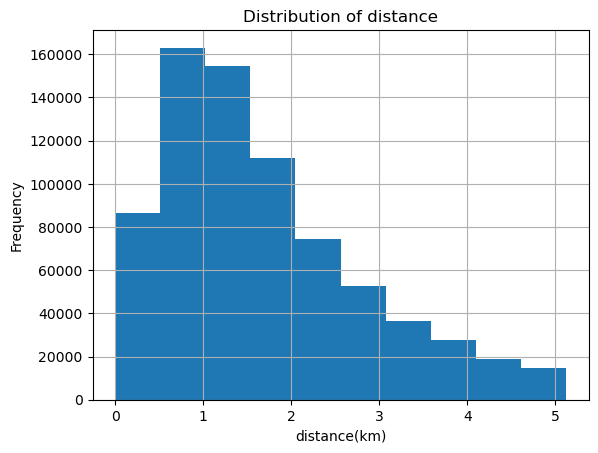

In [125]:

import matplotlib.pyplot as plt
ride1['distance'].hist()
plt.xlabel('distance(km)')
plt.ylabel('Frequency')
plt.title('Distribution of distance')
plt.show()

In [126]:
import sqlite3

In [127]:
conn = sqlite3.connect("D:\\data analytics sem 4\\DAB 422 CAPSTONE PROJECT2\\ASSIGNMENTS\\cyclistdatadb.db")
cur=conn.cursor()

In [128]:
## CREATE ride1 TABLE
ride1.to_sql("ride1",conn,if_exists="replace",index=False)

740644

In [129]:
## CREATE ride1 TABLE
start.to_sql("start",conn,if_exists="replace",index=False)

322762

In [130]:
## CREATE ride1 TABLE
end.to_sql("end",conn,if_exists="replace",index=False)

301070

## 1.What is the average trip duration for each bike type?

In [131]:
cur.execute(
"""SELECT bike_type, AVG(strftime('%s', ended_at) - strftime('%s', started_at)) AS average_trip_duration
FROM ride1
GROUP BY bike_type
""");
# Fetch the result
result = cur.fetchall()
result 



[('classic_bike', 838.2400994794191),
 ('docked_bike', 3508.039222385459),
 ('electric_bike', 673.6976425149321)]

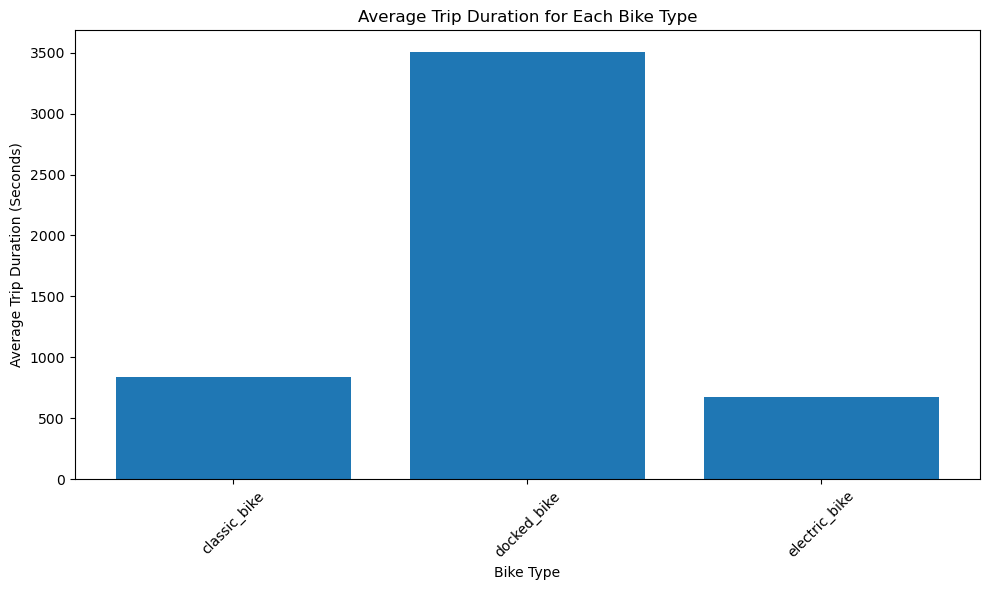

In [132]:
columns = ['bike_type', 'average_trip_duration']
df = pd.DataFrame(result, columns=columns)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(df['bike_type'], df['average_trip_duration'])
plt.xlabel('Bike Type')
plt.ylabel('Average Trip Duration (Seconds)')
plt.title('Average Trip Duration for Each Bike Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.What are the busiest stations in terms of bike rentals?

In [133]:
cur.execute(
"""SELECT station, COUNT(station) AS total_rentals
FROM (
    SELECT origin_station AS station FROM start
    UNION ALL
    SELECT destination_place AS station FROM end
) AS all_stations
GROUP BY station
ORDER BY COUNT(station) DESC;

""");
# Fetch the result
result = cur.fetchall()
result 

[('Wells St & Concord Ln', 5619),
 ('Clark St & Elm St', 5014),
 ('Kingsbury St & Kinzie St', 4901),
 ('Wells St & Elm St', 4690),
 ('Wells St & Huron St', 4577),
 ('Dearborn St & Erie St', 4369),
 ('St. Clair St & Erie St', 4252),
 ('Ashland Ave & Division St', 4185),
 ('Clinton St & Madison St', 4093),
 ('Clinton St & Washington Blvd', 4054),
 ('Streeter Dr & Grand Ave', 3959),
 ('Green St & Madison St', 3858),
 ('Wabash Ave & Grand Ave', 3721),
 ('Desplaines St & Kinzie St', 3631),
 ('Halsted St & Roscoe St', 3619),
 ('New St & Illinois St', 3566),
 ('Sheffield Ave & Fullerton Ave', 3539),
 ('Broadway & Barry Ave', 3539),
 ('Millennium Park', 3526),
 ('LaSalle St & Illinois St', 3469),
 ('Wilton Ave & Belmont Ave', 3434),
 ('Wells St & Hubbard St', 3421),
 ('Clark St & Armitage Ave', 3374),
 ('Damen Ave & Pierce Ave', 3357),
 ('Morgan St & Lake St', 3355),
 ('Clark St & Wrightwood Ave', 3302),
 ('Milwaukee Ave & Grand Ave', 3288),
 ('Wells St & Evergreen Ave', 3243),
 ('University A

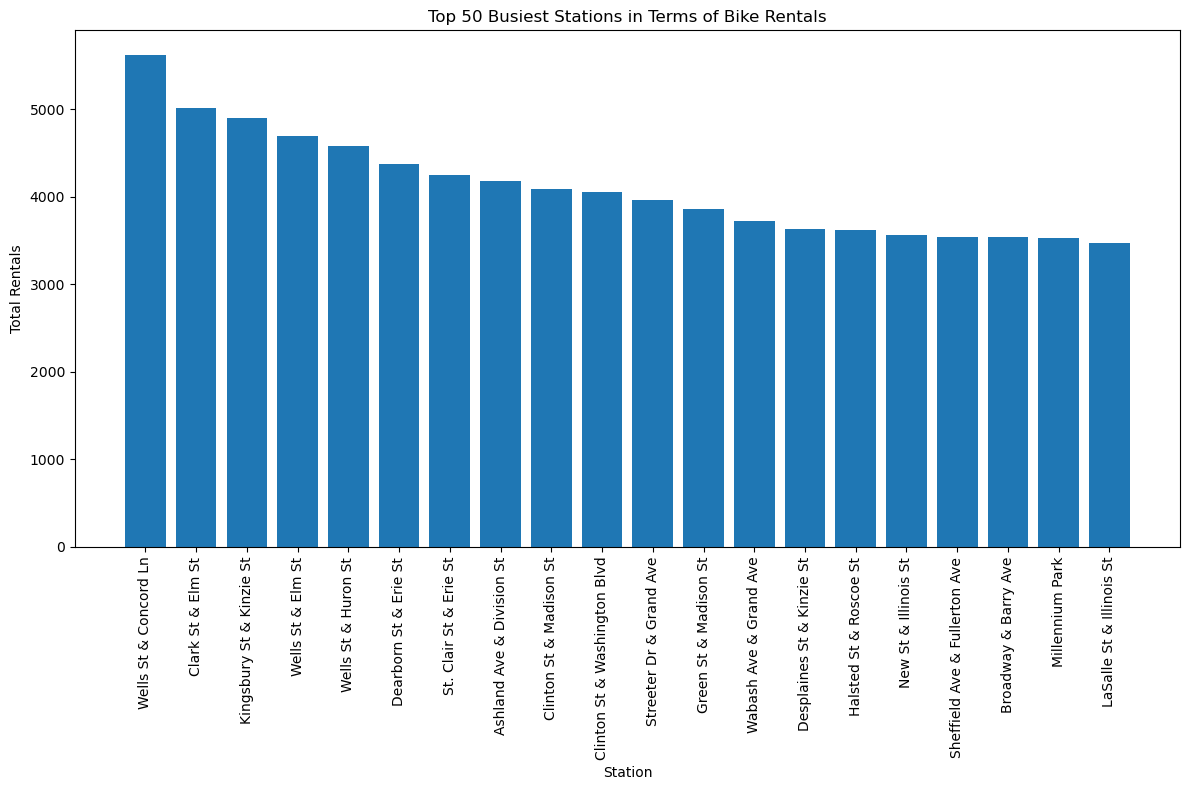

In [134]:
# Convert the SQL query result to a Pandas DataFrame
columns = ['station', 'total_rentals']
df = pd.DataFrame(result, columns=columns)

# Select the top 10 busiest stations
top_20 = df.head(20)

# Plotting the graph for the top 10 stations
plt.figure(figsize=(12, 8))
plt.bar(top_20['station'], top_20['total_rentals'])
plt.xlabel('Station')
plt.ylabel('Total Rentals')
plt.title('Top 50 Busiest Stations in Terms of Bike Rentals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 3.What is the trend in bike rentals over month?

In [135]:
cur.execute(
"""SELECT
    month,
    COUNT(*) AS rental_count
FROM
    ride1
GROUP BY
    month
ORDER BY
    month
""");
# Fetch the result
result = cur.fetchall()
result 

[('Dec', 52301), ('Nov', 241946), ('Oct', 446397)]

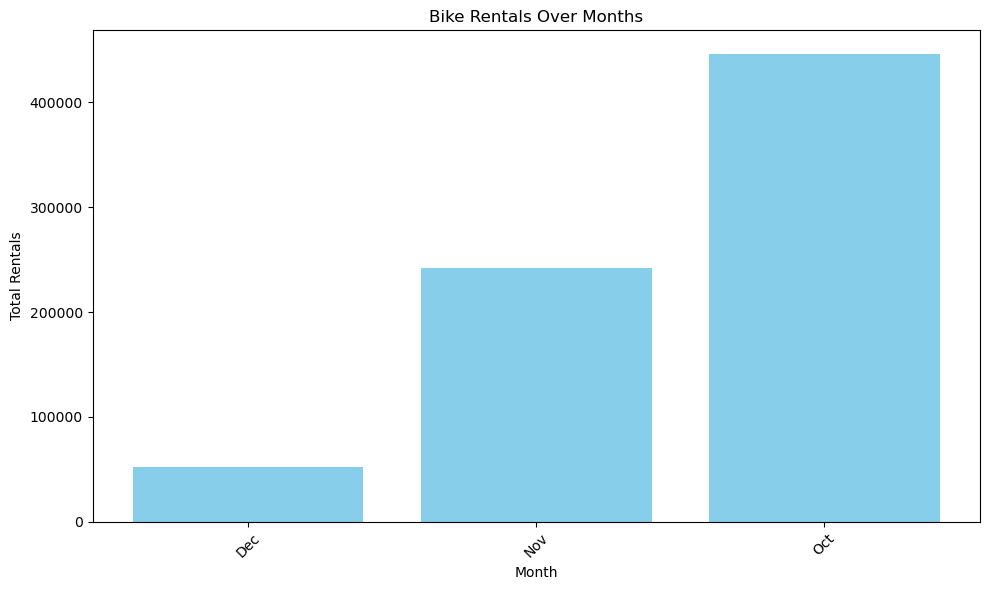

In [136]:
# Assuming 'result' contains the fetched data
df = pd.DataFrame(result, columns=['month', 'rental_count'])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df['month'], df['rental_count'], color='skyblue')
plt.title('Bike Rentals Over Months')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  4. Which days of the week have the highest bike demand?

In [137]:
cur.execute(
"""SELECT 
    STRFTIME('%w', started_at) AS day_of_week_num, 
    CASE 
        WHEN day_of_week= 1 THEN 'Sunday'
        WHEN day_of_week =2 THEN 'Monday'
        WHEN day_of_week =3 THEN 'Tuesday'
        WHEN day_of_week =4 THEN 'Wednesday'
        WHEN day_of_week =5 THEN 'Thursday'
        WHEN day_of_week =6 THEN 'Friday'
        WHEN day_of_week =7 THEN 'Saturday'
    END AS day_of_week, 
    COUNT(*) AS ride_count
FROM 
    ride1
GROUP BY 
    day_of_week_num
ORDER BY 
    ride_count DESC;

""");
# Fetch the result
result = cur.fetchall()
result 

[('6', 'Saturday', 132982),
 ('2', 'Tuesday', 112694),
 ('5', 'Friday', 111485),
 ('3', 'Wednesday', 105675),
 ('0', 'Sunday', 98462),
 ('1', 'Monday', 92248),
 ('4', 'Thursday', 87098)]

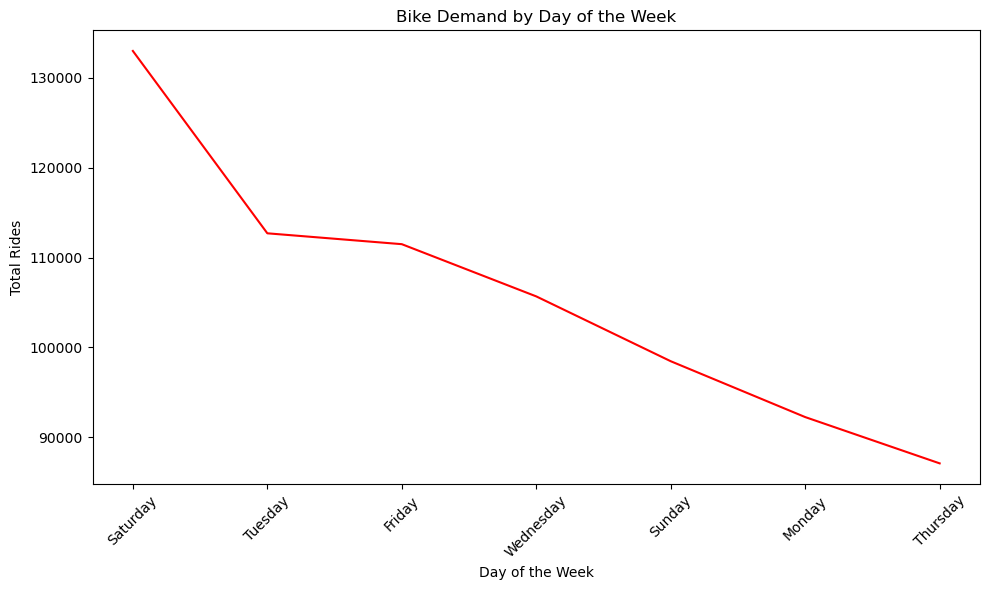

In [138]:

# Assuming 'result' contains the fetched data
df = pd.DataFrame(result, columns=['day_of_week_num', 'day_of_week', 'ride_count'])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['day_of_week'], df['ride_count'], color='red')
plt.title('Bike Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### 5.What is the utilization pattern of bikes during different times of the day?

In [139]:
cur.execute(
"""SELECT 
    strftime('%H:%M:%S', start_time) AS hour_of_day,
    COUNT(*) AS ride_count
FROM ride1
GROUP BY hour_of_day
ORDER BY ride_count DESC
LIMIT 50
""");
# Fetch the result
result = cur.fetchall()
result 

[('13:08:00', 1285),
 ('13:26:00', 1278),
 ('13:09:00', 1272),
 ('13:05:00', 1264),
 ('13:16:00', 1257),
 ('13:15:00', 1250),
 ('13:11:00', 1245),
 ('13:21:00', 1244),
 ('13:14:00', 1243),
 ('13:06:00', 1240),
 ('13:18:00', 1231),
 ('13:17:00', 1222),
 ('13:23:00', 1221),
 ('13:20:00', 1218),
 ('13:25:00', 1216),
 ('13:13:00', 1213),
 ('13:10:00', 1193),
 ('13:03:00', 1191),
 ('13:19:00', 1188),
 ('13:22:00', 1183),
 ('12:16:00', 1182),
 ('12:48:00', 1178),
 ('13:24:00', 1166),
 ('13:29:00', 1165),
 ('13:07:00', 1163),
 ('13:12:00', 1162),
 ('13:31:00', 1159),
 ('13:04:00', 1151),
 ('13:43:00', 1147),
 ('13:49:00', 1145),
 ('13:47:00', 1143),
 ('13:33:00', 1138),
 ('12:45:00', 1134),
 ('13:02:00', 1133),
 ('13:42:00', 1131),
 ('13:32:00', 1131),
 ('13:35:00', 1130),
 ('12:55:00', 1129),
 ('13:45:00', 1128),
 ('13:39:00', 1124),
 ('13:37:00', 1124),
 ('13:34:00', 1123),
 ('12:52:00', 1121),
 ('13:48:00', 1117),
 ('13:30:00', 1113),
 ('12:58:00', 1112),
 ('13:28:00', 1111),
 ('13:27:00',

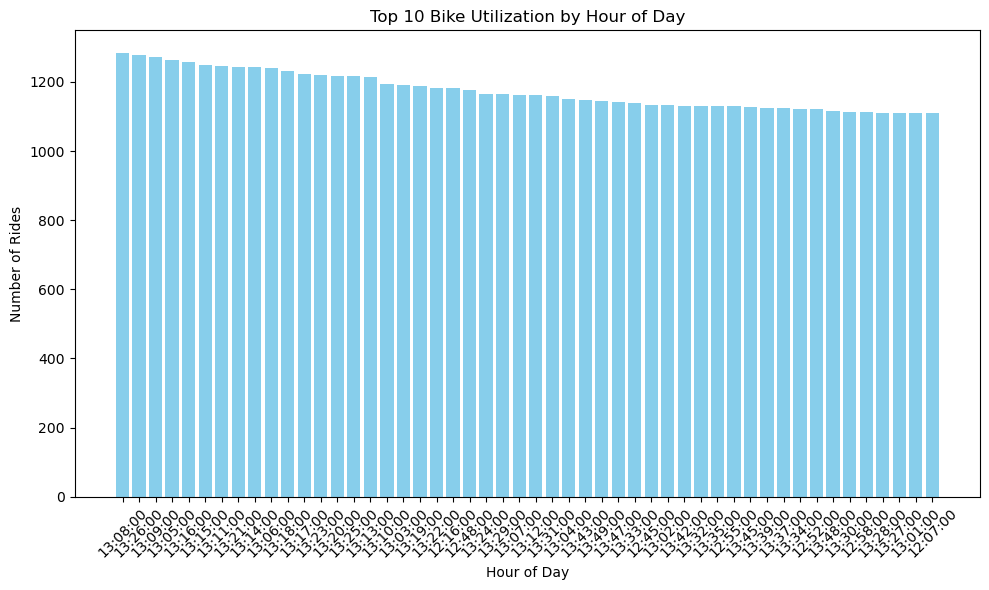

In [140]:
# Assuming 'result' contains the fetched data
df = pd.DataFrame(result, columns=['hour_of_day', 'ride_count'])
# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df['hour_of_day'], df['ride_count'], color='skyblue')
plt.title('Top 10 Bike Utilization by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [141]:
pip install prophet

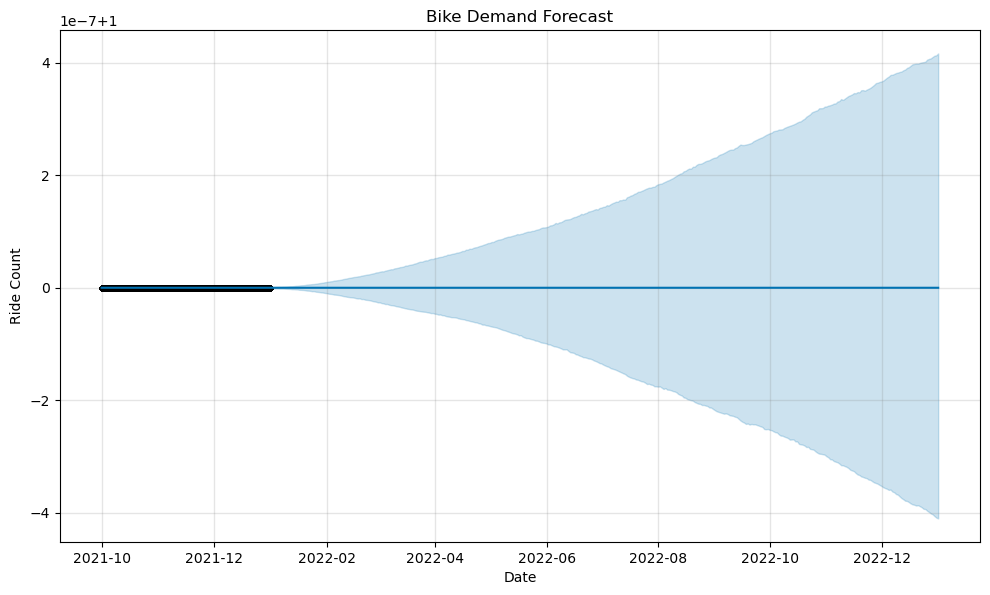

In [142]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


# Create a 'y' column with the value 1 for each ride
ride1['y'] = 1

# Create a Prophet model
model = Prophet()

# Rename columns to 'ds' and 'y'
ride1.rename(columns={'started_at': 'ds'}, inplace=True)

# Fit the model
model.fit(ride1)

# Create a dataframe with future dates
future = model.make_future_dataframe(periods=365)  # Adjust the number of days as needed

# Generate predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Bike Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Ride Count')
plt.show()


In [143]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-30 20:00:00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2021-09-30 20:02:00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2021-09-30 20:03:00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2021-09-30 20:04:00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2021-09-30 20:05:00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99649,2022-12-27 18:59:00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99650,2022-12-28 18:59:00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99651,2022-12-29 18:59:00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99652,2022-12-30 18:59:00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [145]:
future

,ds
0,2021-09-30 20:00:00
1,2021-09-30 20:02:00
2,2021-09-30 20:03:00
3,2021-09-30 20:04:00
4,2021-09-30 20:05:00
...,...
99649,2022-12-27 18:59:00
99650,2022-12-28 18:59:00
99651,2022-12-29 18:59:00
99652,2022-12-30 18:59:00


In [146]:
# Assuming 'your_dataframe' is the name of your DataFrame
future.to_csv('D:\\data analytics sem 4\\DAB 422 CAPSTONE PROJECT2\\ASSIGNMENTS\\forcast.csv', index=False)